In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer 

In [3]:
df = pd.read_csv("/Users/willxiao/Desktop/amazon/HandGripStrengthener.csv")
df

,Unnamed: 0,author,rating,title,content,date,verified
0,0,JD,5.0,Good product,Easy to use and effectiv,Reviewed in Australia on 29 December 2023,Verified Purchase
1,1,tony pertile,4.0,"Seems to do the job, but early days yet","seems to be well made, and feels good in the h...",Reviewed in Australia on 19 February 2024,Verified Purchase
2,2,ADAM,5.0,not accurate force shown on front,the thing at the front is not reliable as it d...,Reviewed in Australia on 29 December 2023,Verified Purchase
3,3,Alexandros,5.0,Great value,What I expected and then some!,Reviewed in Australia on 1 April 2024,Verified Purchase
4,4,Ivan,3.0,"Works well, a bit hard to adjust and but not 6...","The grip is comfortable, and the device is com...",Reviewed in Australia on 26 March 2023,Verified Purchase
5,5,Fred,4.0,It feels a little shaky when it is around the ...,it was pretty good at the lower tensions but i...,Reviewed in Australia on 10 November 2023,Verified Purchase
6,6,Frank Caruso,5.0,Good quality and good value for money,n,Reviewed in Australia on 7 February 2024,Verified Purchase
7,7,Frederico Roveda,2.0,Small,"Small, the spring got tired in 3 days",Reviewed in Australia on 11 January 2024,Verified Purchase
8,8,Cecil beaudoin,5.0,NaN,"They are great because of the ease to adjust, ...",Reviewed in Canada on 14 September 2023,Verified Purchase
9,9,Guy Vigeant,3.0,NaN,"first pair broke in my hand, this one works so...",Reviewed in Canada on 13 June 2023,Verified Purchase


In [6]:
# combine title and content
def combine_columns(df, col1, col2):
    df['combined'] = df[col1].fillna(df[col2])
    return df
combine_columns(df, "title", "content")


,Unnamed: 0,author,rating,title,content,date,verified,combined
0,0,JD,5.0,Good product,Easy to use and effectiv,Reviewed in Australia on 29 December 2023,Verified Purchase,Good product
1,1,tony pertile,4.0,"Seems to do the job, but early days yet","seems to be well made, and feels good in the h...",Reviewed in Australia on 19 February 2024,Verified Purchase,"Seems to do the job, but early days yet"
2,2,ADAM,5.0,not accurate force shown on front,the thing at the front is not reliable as it d...,Reviewed in Australia on 29 December 2023,Verified Purchase,not accurate force shown on front
3,3,Alexandros,5.0,Great value,What I expected and then some!,Reviewed in Australia on 1 April 2024,Verified Purchase,Great value
4,4,Ivan,3.0,"Works well, a bit hard to adjust and but not 6...","The grip is comfortable, and the device is com...",Reviewed in Australia on 26 March 2023,Verified Purchase,"Works well, a bit hard to adjust and but not 6..."
5,5,Fred,4.0,It feels a little shaky when it is around the ...,it was pretty good at the lower tensions but i...,Reviewed in Australia on 10 November 2023,Verified Purchase,It feels a little shaky when it is around the ...
6,6,Frank Caruso,5.0,Good quality and good value for money,n,Reviewed in Australia on 7 February 2024,Verified Purchase,Good quality and good value for money
7,7,Frederico Roveda,2.0,Small,"Small, the spring got tired in 3 days",Reviewed in Australia on 11 January 2024,Verified Purchase,Small
8,8,Cecil beaudoin,5.0,NaN,"They are great because of the ease to adjust, ...",Reviewed in Canada on 14 September 2023,Verified Purchase,"They are great because of the ease to adjust, ..."
9,9,Guy Vigeant,3.0,NaN,"first pair broke in my hand, this one works so...",Reviewed in Canada on 13 June 2023,Verified Purchase,"first pair broke in my hand, this one works so..."


<Axes: title={'center': 'ratings count'}, xlabel='rating'>

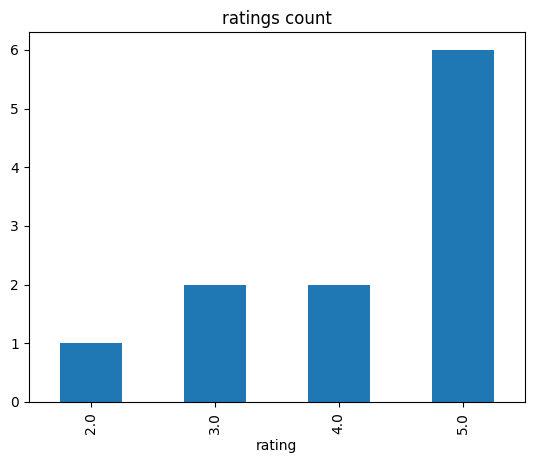

In [7]:
df["rating"].value_counts().sort_index().plot(kind = "bar", title="ratings count")

In [8]:
x = df.combined[0]
y = df.combined[7]

In [9]:
tokens = nltk.word_tokenize(x)
tags = nltk.pos_tag(tokens)
tags

[('Good', 'JJ'), ('product', 'NN')]

In [10]:
chunks = nltk.chunk.ne_chunk(tags)
chunks.pprint()

(S (GPE Good/JJ) product/NN)


In [11]:
sentiments = {}
for i in range(len(df)):
    try:
        sentiments[i] = sia.polarity_scores(df.combined[i])["compound"]
    except:
        print(i)

sentiments

0
1
2
3
4
5
6
7
8
9
10


{}

In [13]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(":(")

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}